# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: MLOps**

### Tecnológico de Monterrey

## **Fase 1 - Avance de proyecto - Equipo 7**
### **Problema de asignación de créditos: South German Dataset.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

## **Manipulación y preparación de datos**

In [2]:
data = pd.read_csv(r'./data/raw/SouthGermanCredit.asc', sep=' ')
data.head(5)

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
data.columns=["status", "duration", "credit_history", "purpose", "amount", "savings", "employment_duration", "installment_rate", "personal_status_sex", "other_debtors",
            "present_residence", "property", "age", "other_installment_plans", "housing", "number_credits", "job", "people_liable", "telephone", "foreign_worker",
            "credit_risk"]
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [24]:
data.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [26]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != "O"]
print('Number of Numerical Feature :', len(numerical_feature))

Number of Numerical Feature : 21


In [27]:
for feature in numerical_feature:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is status and number of categories are 4
The feature is duration and number of categories are 33
The feature is credit_history and number of categories are 5
The feature is purpose and number of categories are 10
The feature is amount and number of categories are 923
The feature is savings and number of categories are 5
The feature is employment_duration and number of categories are 5
The feature is installment_rate and number of categories are 4
The feature is personal_status_sex and number of categories are 4
The feature is other_debtors and number of categories are 3
The feature is present_residence and number of categories are 4
The feature is property and number of categories are 4
The feature is age and number of categories are 53
The feature is other_installment_plans and number of categories are 3
The feature is housing and number of categories are 3
The feature is number_credits and number of categories are 4
The feature is job and number of categories are 4
The fe

In [28]:
discrete_variable=[feature for feature in numerical_feature if len(data[feature].unique())<9]
print('Discrete Variable Feature : {}'.format(len(discrete_variable)))

Discrete Variable Feature : 17


In [13]:
continous_variable=[feature for feature in numerical_feature if feature not in data[discrete_variable]]


print('Continous Variable Feature : {}'.format(len(continous_variable)))

Continous Variable Feature : 4


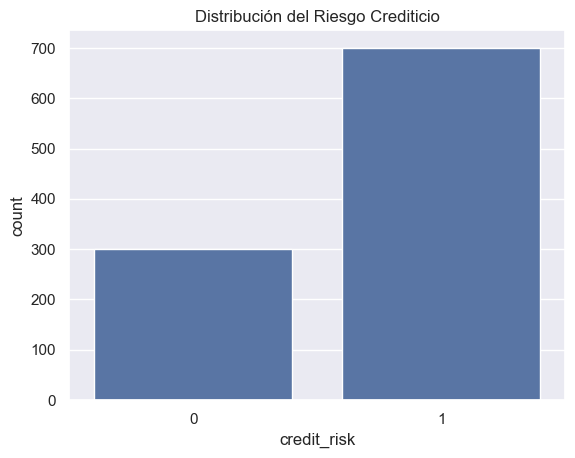

In [36]:
sns.countplot(x=data['credit_risk'])
plt.title("Distribución del Riesgo Crediticio")
plt.show()

<Axes: xlabel='credit_risk', ylabel='count'>

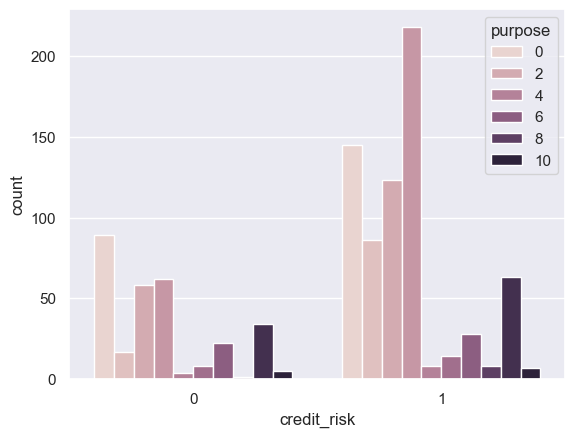

In [37]:
sns.countplot(x='credit_risk',hue='purpose',data=data)

(array([ 81., 211., 153., 123.,  91.,  79.,  46.,  32.,  19.,  30.,  27.,
         23.,  18.,  11.,   9.,   6.,   7.,   6.,   4.,   5.,   5.,   1.,
          3.,   4.,   1.,   4.,   0.,   0.,   0.,   1.]),
 array([  250. ,   855.8,  1461.6,  2067.4,  2673.2,  3279. ,  3884.8,
         4490.6,  5096.4,  5702.2,  6308. ,  6913.8,  7519.6,  8125.4,
         8731.2,  9337. ,  9942.8, 10548.6, 11154.4, 11760.2, 12366. ,
        12971.8, 13577.6, 14183.4, 14789.2, 15395. , 16000.8, 16606.6,
        17212.4, 17818.2, 18424. ]),
 <BarContainer object of 30 artists>)

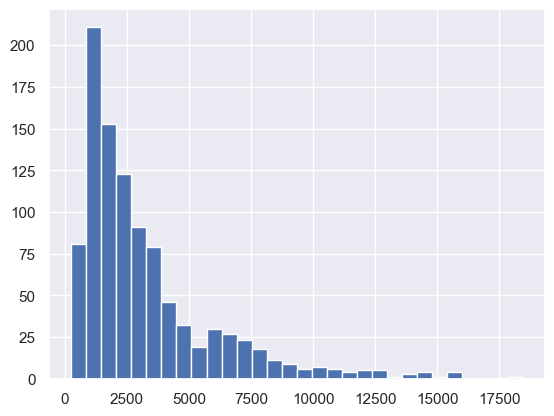

In [39]:
plt.hist(x='amount',bins=30,data=data)

In [40]:
data[data['credit_risk']==0]

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
22,2,36,2,5,2384,1,2,4,3,1,...,4,33,3,1,1,2,2,1,2,0
45,1,18,2,0,1216,1,2,4,2,1,...,3,23,3,1,1,3,2,2,2,0
47,4,18,4,6,1864,2,3,4,2,1,...,1,30,3,2,2,3,2,1,2,0
97,2,36,3,9,4455,1,3,2,1,1,...,1,30,2,2,2,4,2,2,2,0
110,1,15,2,0,3959,1,3,3,2,1,...,2,29,3,2,1,3,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


Text(0.5, 1.0, 'Histograma de montos de préstamos incobrables')

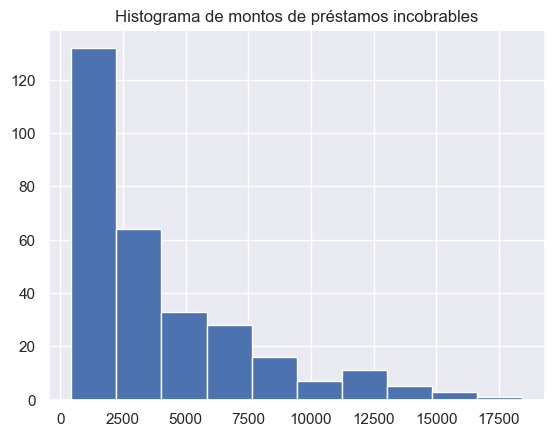

In [42]:
plt.hist(data=data[data['credit_risk']==0],x='amount')
plt.title('Histograma de montos de préstamos incobrables')

In [44]:
max(data[data['credit_risk']==0]['amount'])

18424

In [110]:
plt.figure(figsize=(25,25),facecolor='white')
plotnumber = 1

<Figure size 2500x2500 with 0 Axes>

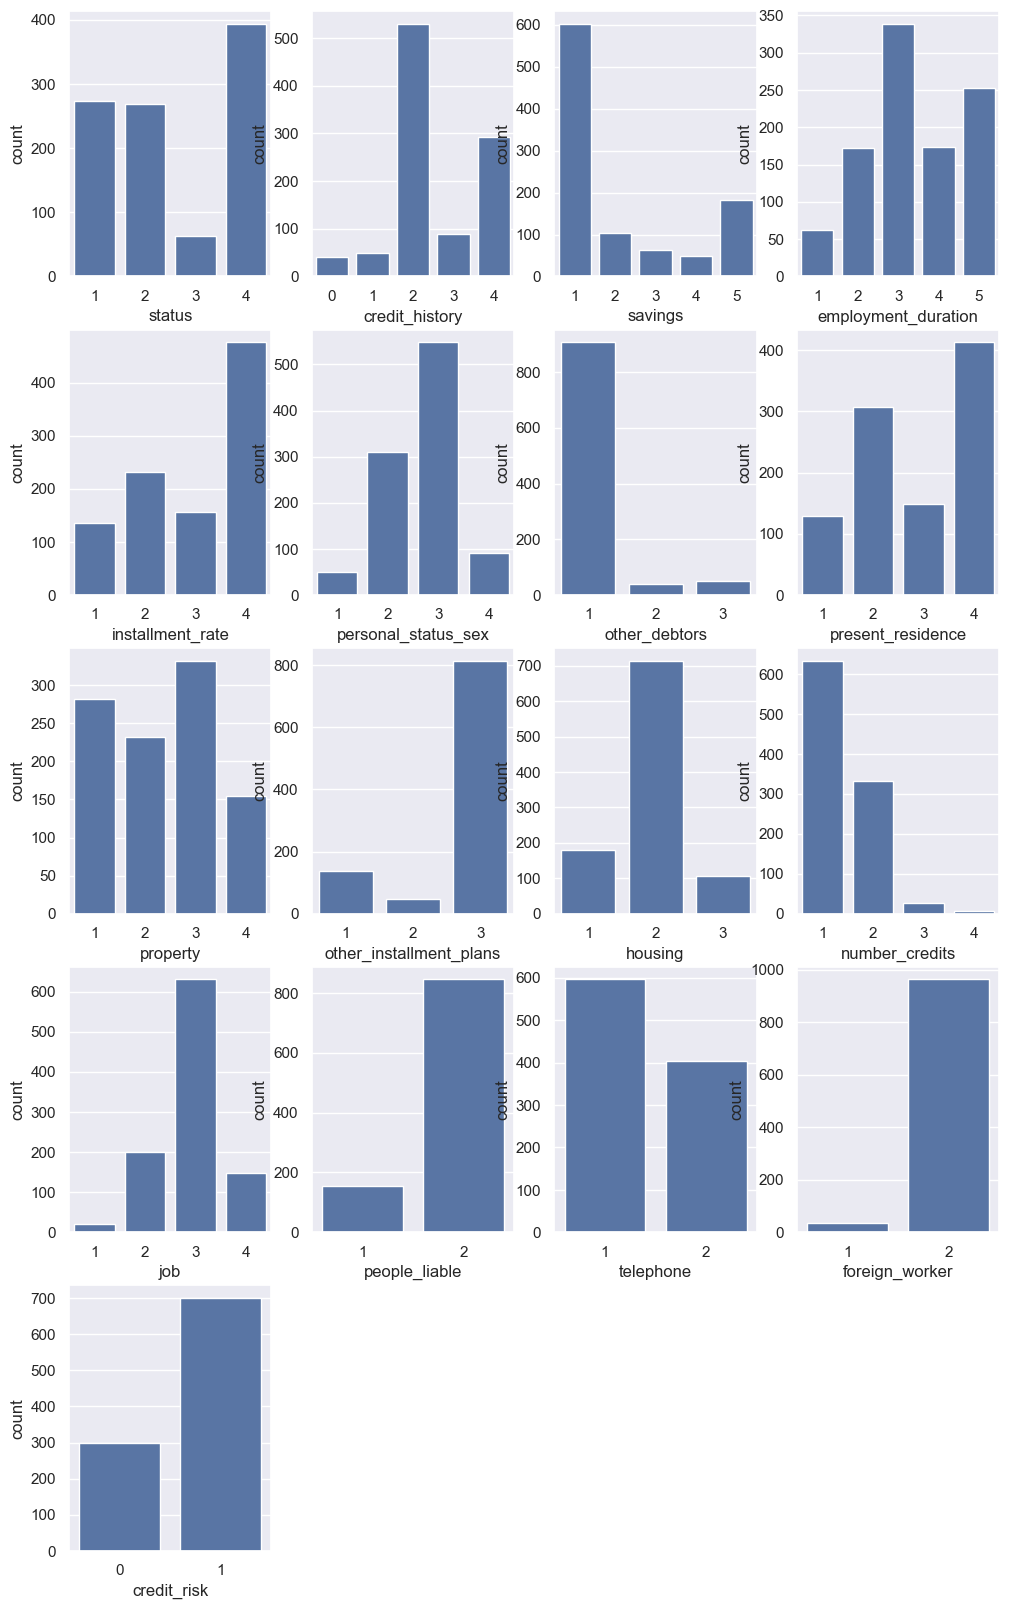

In [104]:
plt.figure(figsize=(12,20)) 
for i in discrete_variable:
    # There Are 17 Feature In Discrete Variable
    if plotnumber <= 17:
        ax = plt.subplot(5,4,plotnumber)
        sns.countplot(x=i,data=data[discrete_variable])
        plt.xlabel(i,fontsize=12)
    plotnumber += 1
   
plt.show()


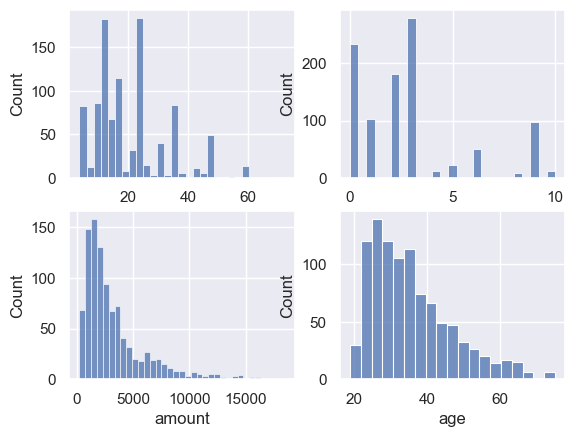

In [113]:
for i in continous_variable:
    # There Are 4 Feature In Continous Variable
    if plotnumber <= 4:
        ax = plt.subplot(2,2,plotnumber)
        sns.histplot(x=i,data=data[continous_variable])
        plt.xlabel(i,fontsize=12)
    plotnumber += 1
plt.show()

In [193]:
data.to_csv(r'./data/Preprocess.csv', index=False)

## **Exploración y preprocesamiento de datos**

In [120]:
#from imblearn.over_sampling import ADASYN
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import pickle

In [191]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore')

In [265]:
df = pd.read_csv(r'./data/Preprocess.csv')
df.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,2,1,1,1


In [204]:
df.isnull().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [250]:
#print(data.describe())

In [249]:
descripcion = pd.DataFrame(data.describe())
descripcion

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


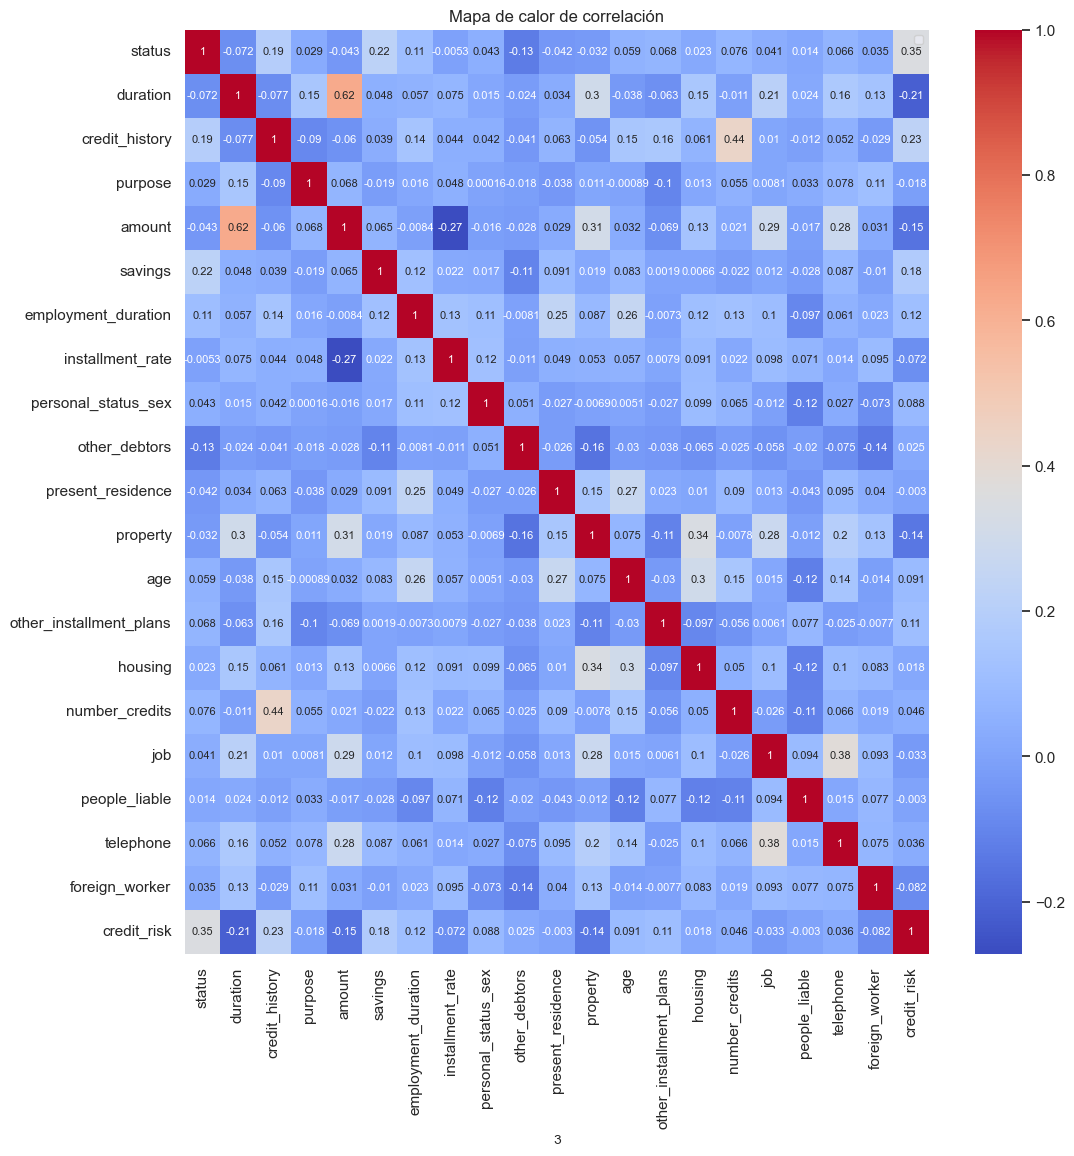

In [251]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title("Mapa de calor de correlación")
plt.xlabel(i,fontsize=10)
plt.legend(fontsize = 8)
plt.show()

In [252]:
var_num

['duration', 'amount', 'age']

In [253]:
columns_sel=['duration','purpose','amount','other_debtors','age','other_installment_plans','housing','number_credits','job',
        'people_liable','foreign_worker']


In [254]:
colmns_sel_outlider =  ['duration', 'amount', 'age', 'number_credits']

In [255]:
len(colmns_sel_outlider)

4

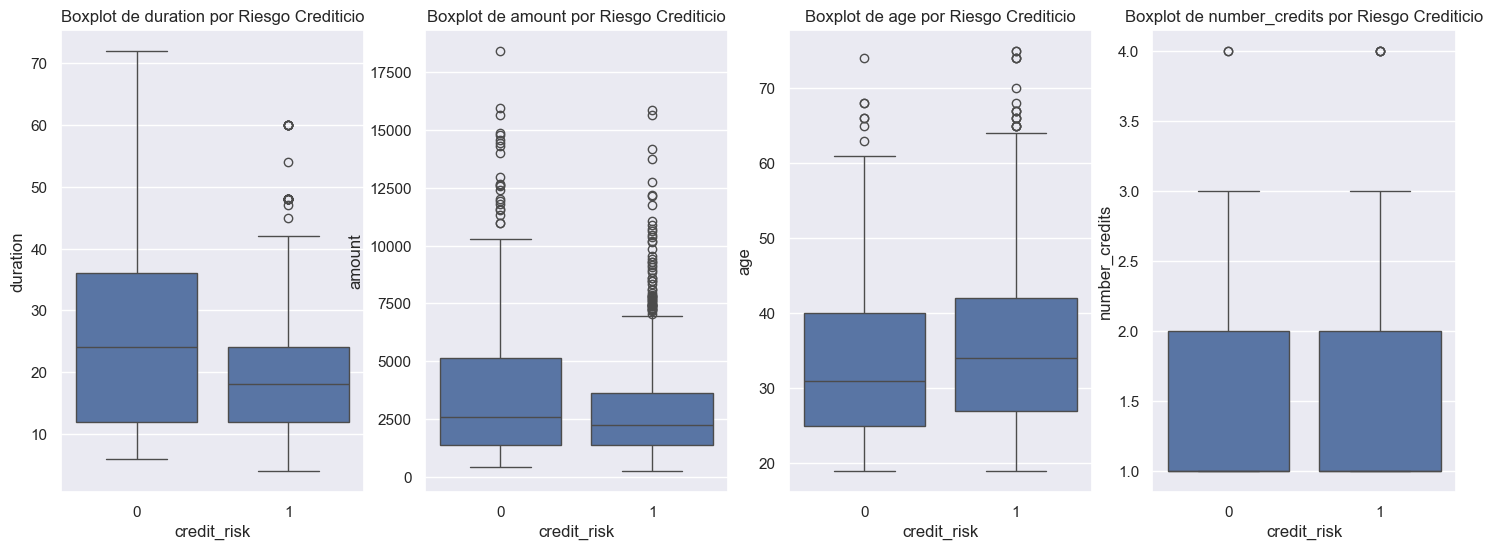

In [266]:
fig, axs = plt.subplots(1, len(colmns_sel_outlider), figsize=(18, 6))
for i, col in enumerate(colmns_sel_outlider):
    sns.boxplot(x=df['credit_risk'], y=df[col], ax=axs[i])
    axs[i].set_title(f"Boxplot de {col} por Riesgo Crediticio")
plt.show()

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1

((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR))).sum()

for col in columns_sel: 
    #print(col) 
    q75,q25=np.percentile(df[i],[75,25])
    iqr=q75 - q25
    minimum = q25 - 1.5*iqr
    maximum = q75 + 1.5*iqr
    df.loc[df[i] < minimum, i] = minimum
    df.loc[df[i] > maximum, i] = maximum


In [267]:

#def Atipicos(df, columns_sel):
tb_Atipicos = pd.DataFrame(columns = ['Columna', 'IQR', 'Atipicos', 'EliminadosP100'])
#tb_Atipicos = ['Columna', 'IQR', 'Atipicos', 'EliminadosP100']
Registros_df = df.shape[0]

for col in columns_sel: 
    #print(col) 
    Q1 = (df[col].dropna().quantile(0.25))
    Q3 = (df[col].dropna().quantile(0.75))
    IQR = Q3 - Q1
    vAtipicos = ( (( df[col].dropna() < (Q1 - 1.5 * IQR)) | ( df[col].dropna() > (Q3 + 1.5 * IQR))).sum() )
    BM_Outliers = (( df[col] < (Q1 - 1.5 * IQR)) | ( df[col] > (Q3 + 1.5 * IQR)))
    eEliminados = vAtipicos/Registros_df*100

    df.drop(df[BM_Outliers].index, inplace = True)

    new_RowAti={'Columna':col,'IQR':IQR, 'Atipicos':vAtipicos, 'EliminadosP100': eEliminados}
    #print(new_RowAti)
    #tb_Atipicos = tb_Atipicos.concat([df, pd.DataFrame([new_RowAti])], ignore_index=True)  
    #tb_Atipicos = tb_Atipicos.append(new_RowAti, ignore_index=True)
    #tb_Atipicos = pd.concat([tb_Atipicos, pd.DataFrame([new_RowAti])], ignore_index=True)
    tb_Atipicos.loc[len(df)]=new_RowAti
tb_Atipicos
    

,Columna,IQR,Atipicos,EliminadosP100
930,duration,12.0,70,7.0
833,purpose,2.0,97,9.7
773,amount,2243.0,60,6.0
696,other_debtors,0.0,77,7.7
679,age,15.0,17,1.7
572,other_installment_plans,0.0,107,10.7
411,housing,0.0,161,16.1
409,number_credits,1.0,2,0.2
277,job,0.0,132,13.2
255,people_liable,0.0,22,2.2


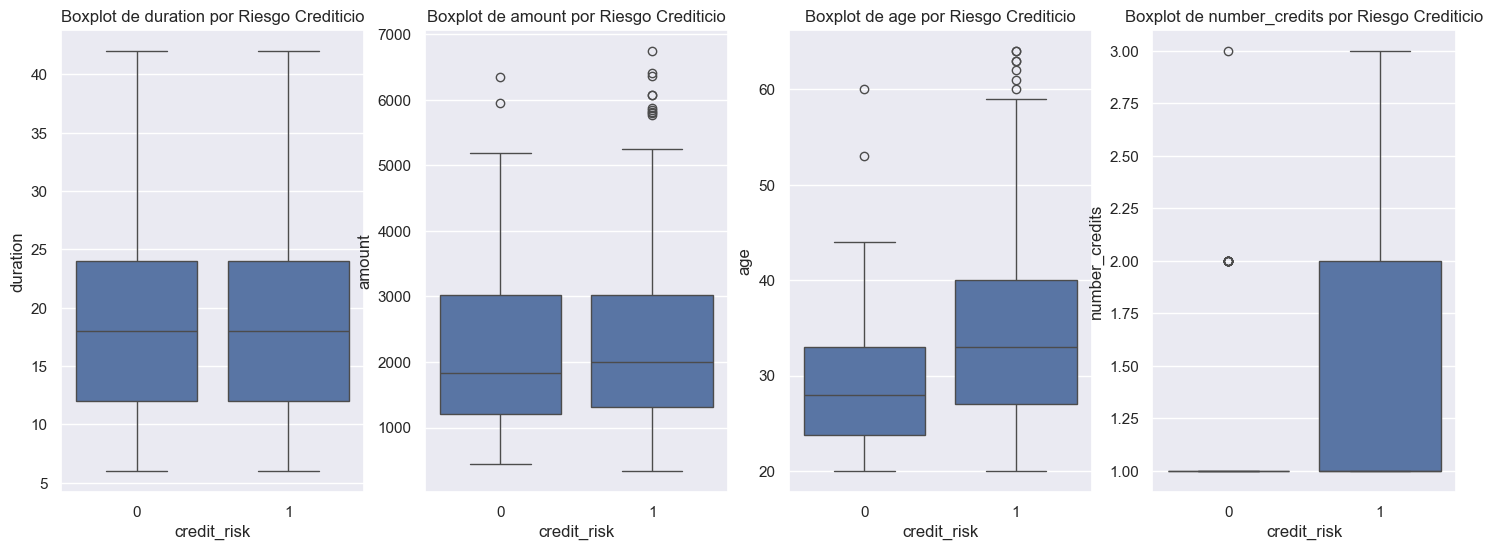

In [268]:
fig, axs = plt.subplots(1, len(colmns_sel_outlider), figsize=(18, 6))
for i, col in enumerate(colmns_sel_outlider):
    sns.boxplot(x=df['credit_risk'], y=df[col], ax=axs[i])
    axs[i].set_title(f"Boxplot de {col} por Riesgo Crediticio")
plt.show()

In [269]:
df.skew()

status                    -0.457432
duration                   0.652140
credit_history             0.084758
purpose                    0.228909
amount                     1.125331
savings                    0.804239
employment_duration        0.088698
installment_rate          -0.885044
personal_status_sex       -0.222140
other_debtors              0.000000
present_residence         -0.003948
property                  -0.178267
age                        1.085695
other_installment_plans    0.000000
housing                    0.000000
number_credits             0.977719
job                        0.000000
people_liable              0.000000
telephone                  0.711400
foreign_worker             0.000000
credit_risk               -1.441325
dtype: float64

In [270]:
col=['amount','savings','number_credits']
for i in col:
    df[i]=np.log(df[i]+1)

In [271]:
df.skew()

status                    -0.457432
duration                   0.652140
credit_history             0.084758
purpose                    0.228909
amount                    -0.180211
savings                    0.617187
employment_duration        0.088698
installment_rate          -0.885044
personal_status_sex       -0.222140
other_debtors              0.000000
present_residence         -0.003948
property                  -0.178267
age                        1.085695
other_installment_plans    0.000000
housing                    0.000000
number_credits             0.830676
job                        0.000000
people_liable              0.000000
telephone                  0.711400
foreign_worker             0.000000
credit_risk               -1.441325
dtype: float64

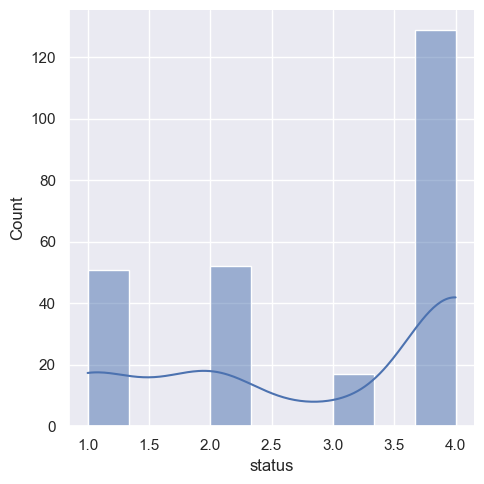

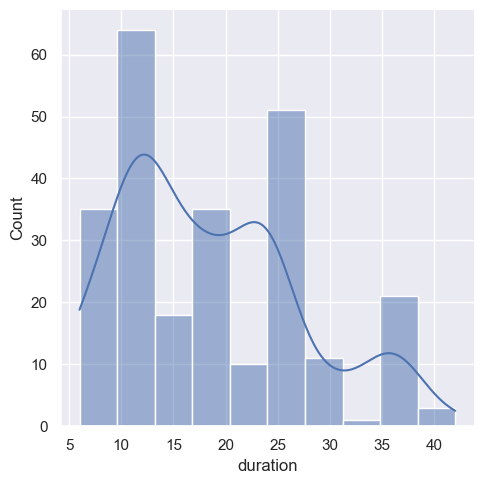

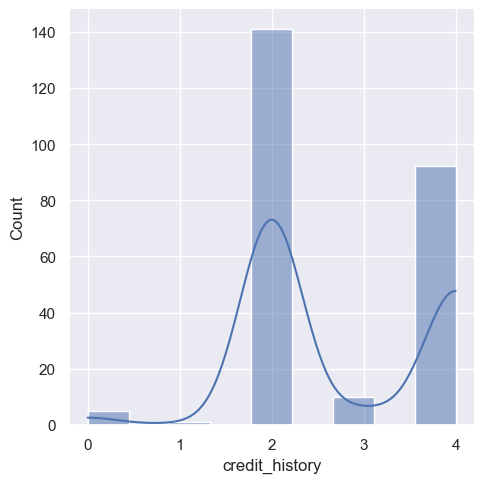

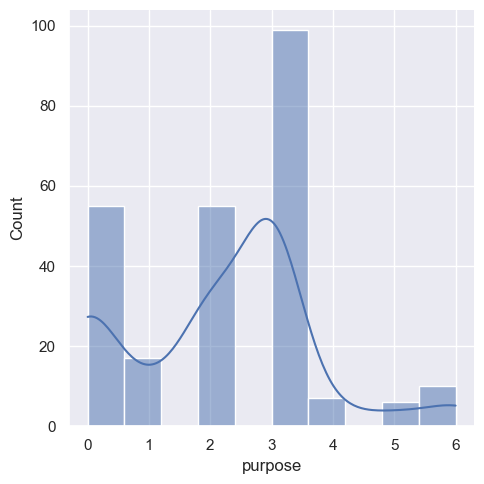

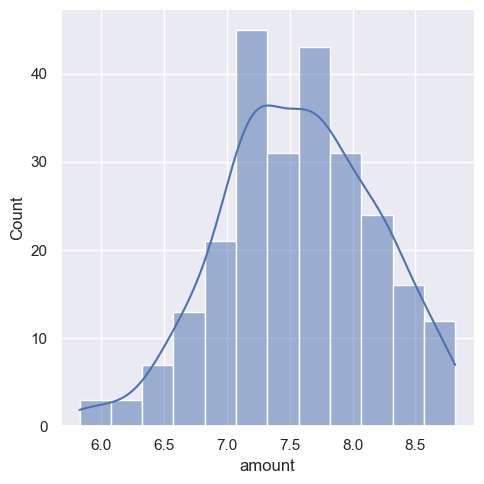

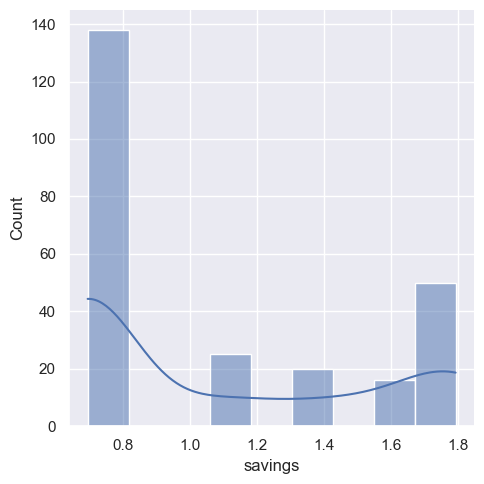

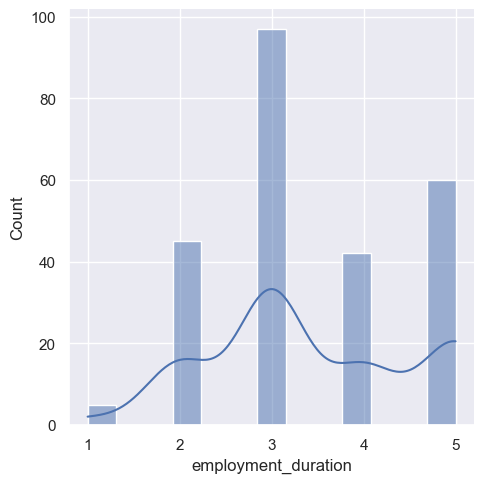

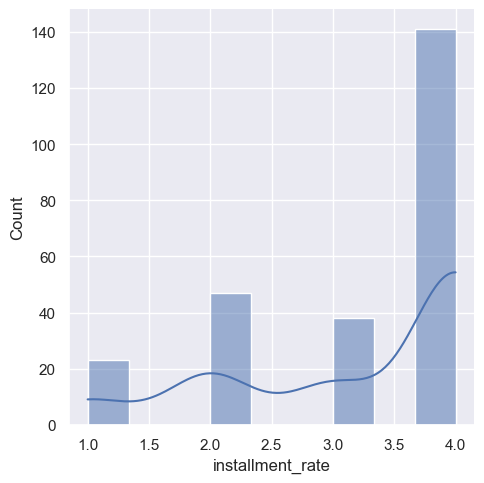

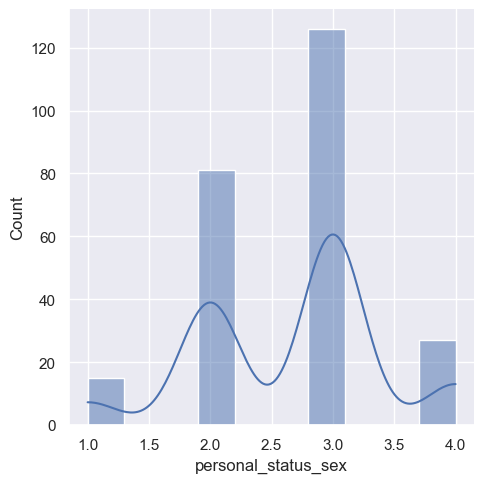

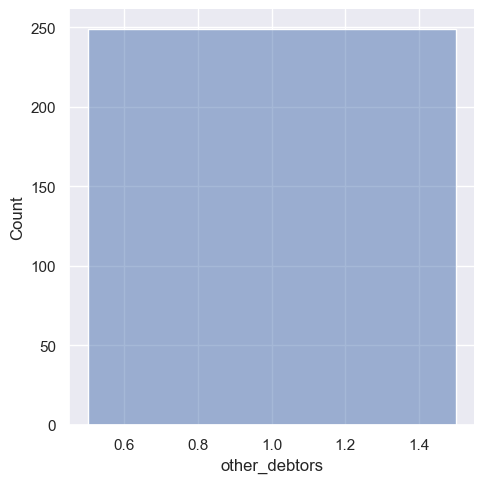

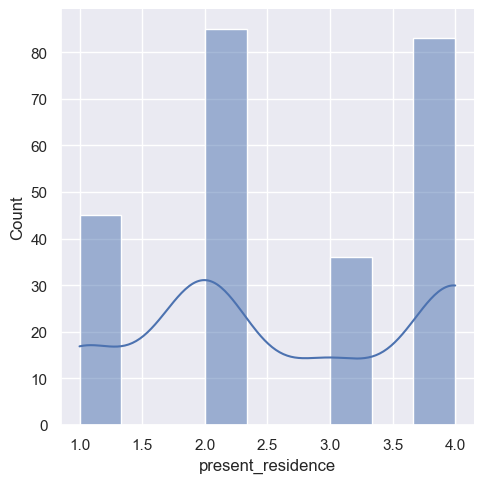

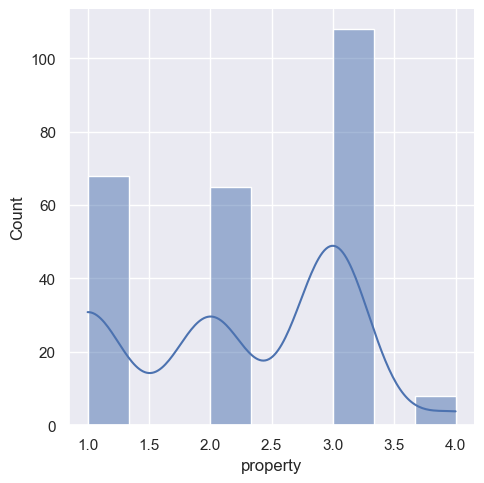

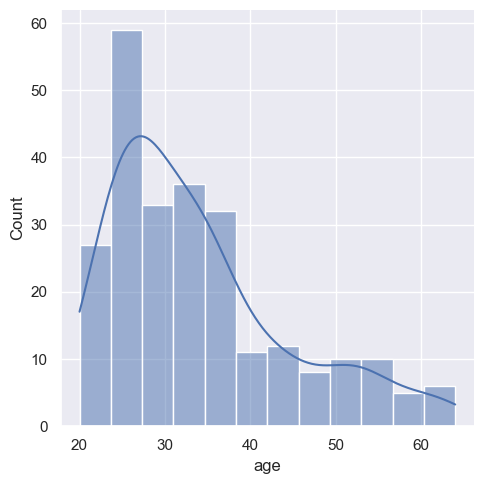

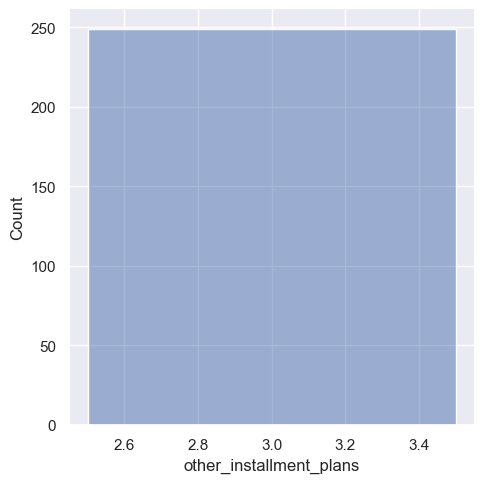

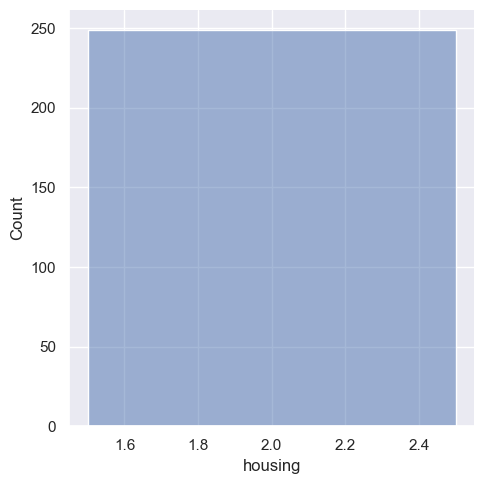

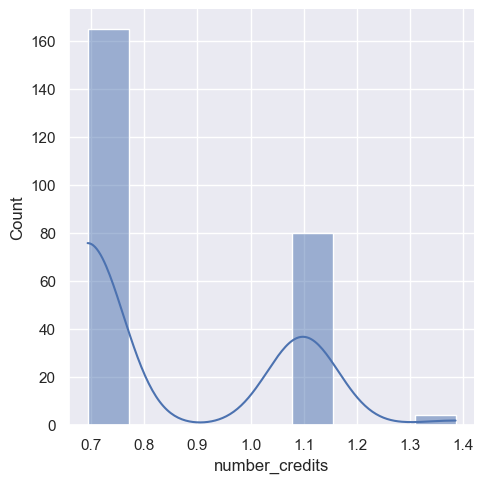

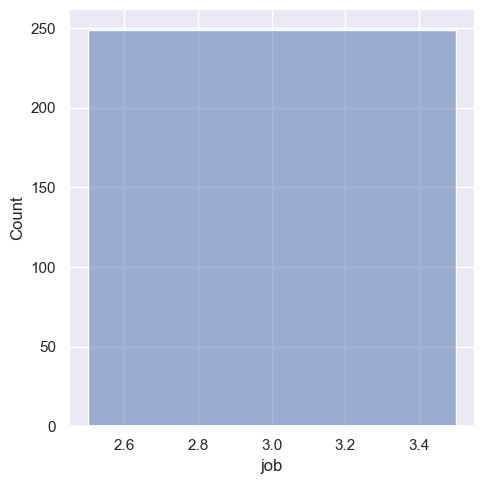

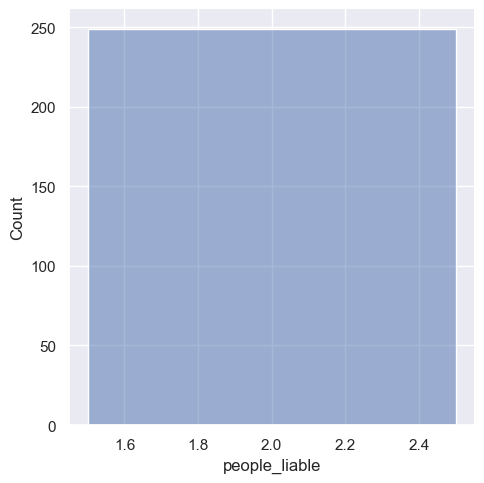

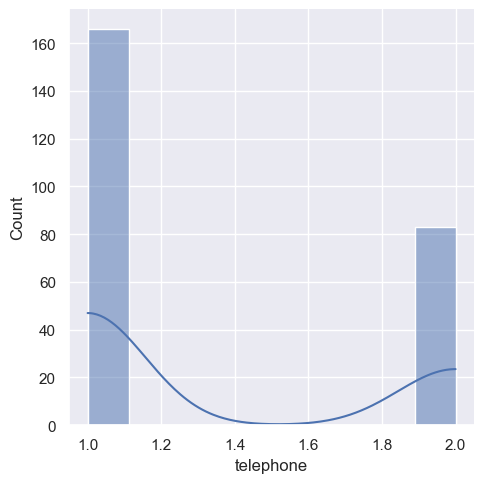

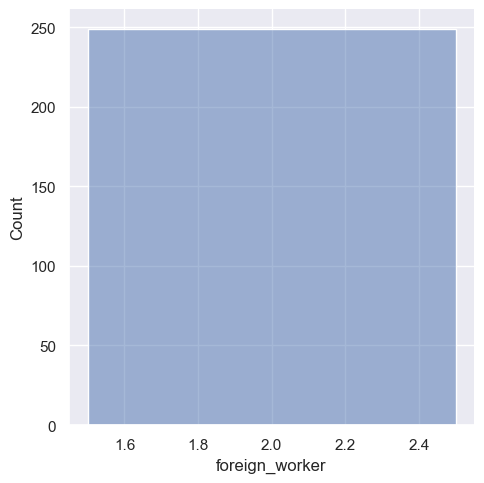

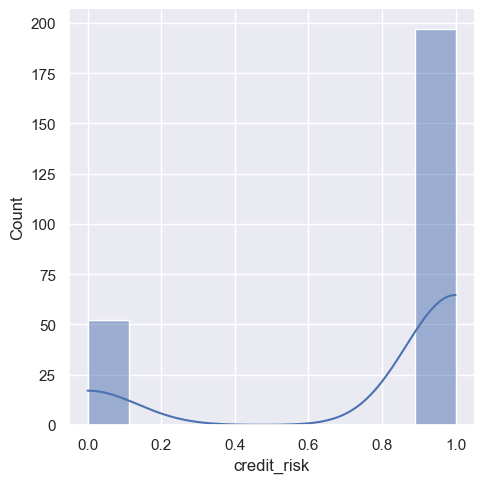

In [272]:
for i in df.columns:
    sns.displot(data=df,x=i,kde=True)

In [273]:
del df['other_debtors']
del df['other_installment_plans']
del df['housing']
del df['job']
del df['people_liable']
del df['foreign_worker']

In [274]:
scaling = [feature for feature in df.columns if feature not in ['credit_risk']]

In [275]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[scaling])

StandardScaler()

In [276]:
scaler.transform(df[scaling])

array([[-1.53267985, -1.43318683,  1.22741972, ..., -0.27792805,
        -0.70227598, -0.70710678],
       [-0.7258357 ,  2.02144551,  1.22741972, ...,  0.20066175,
        -0.70227598, -0.70710678],
       [-0.7258357 , -0.74226036,  1.22741972, ..., -0.75651784,
        -0.70227598, -0.70710678],
       ...,
       [-0.7258357 ,  0.63959257, -0.71307241, ..., -1.13938968,
        -0.70227598,  1.41421356],
       [-1.53267985, -0.74226036, -0.71307241, ..., -1.3308256 ,
        -0.70227598, -0.70710678],
       [-1.53267985,  1.33051904, -0.71307241, ..., -0.27792805,
        -0.70227598, -0.70710678]])

In [277]:
df2=pd.DataFrame(scaler.transform(df[scaling]),columns=df[scaling].columns)

In [278]:
final=pd.concat([df[['credit_risk']].reset_index(drop=True),df2],axis=1)
final.head()

,credit_risk,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,present_residence,property,age,number_credits,telephone
0,1,-1.532680,-1.433187,1.227420,0.54404,0.022392,-0.819956,0.518670,-2.102864,-0.884798,1.219507,0.874962,-0.277928,-0.702276,-0.707107
1,1,-0.725836,2.021446,1.227420,0.54404,0.312820,-0.819956,1.428168,0.774131,0.450443,1.219507,-1.382712,0.200662,-0.702276,-0.707107
2,1,-0.725836,-0.742260,1.227420,1.20485,-0.497893,-0.819956,0.518670,0.774131,0.450443,0.329017,-0.253875,-0.756518,-0.702276,-0.707107
3,1,-0.725836,-0.857415,0.257174,0.54404,1.481051,-0.819956,0.518670,-1.143865,0.450443,1.219507,-0.253875,1.636431,-0.702276,-0.707107
4,1,0.887853,-0.396797,-0.713072,-1.43839,0.999906,1.576673,-0.390829,-0.184867,0.450443,-0.561474,2.003799,-0.469364,-0.702276,-0.707107


In [280]:
final.to_csv(r'./data/Final_Model.csv',index=False)

In [281]:
file = 'Scaler_Credit_Data.pkl'

pickle.dump(scaler,open(file,'wb'))

## **Aqui Finaliza PreProcesamiento**

## **Modelo**

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
#from imblearn.over_sampling import ADASYN
from lightgbm import LGBMClassifier
#from xgboost import XGBClassifier
from collections import Counter
from scipy.stats import randint
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import warnings
import pickle

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import f1_score

In [121]:
df = pd.read_csv(r"./data/Final_Model.csv")
#df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [122]:
X=df.drop(['credit_risk'],axis=1)
Y=df['credit_risk']
Y

0      1
1      1
2      1
3      1
4      1
      ..
244    0
245    0
246    0
247    0
248    0
Name: credit_risk, Length: 249, dtype: int64

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
def model(X=X_train, y=y_train):
    
    models=[]
    models.append(('GradientBoostingClassifier',GradientBoostingClassifier()))
    #models.append(('XGBClassifier',XGBClassifier(eval_metric='mlogloss')))
    models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
    models.append(('RandomForestClassifier',RandomForestClassifier()))
    models.append(('AdaBoostClassifier',AdaBoostClassifier()))
    models.append(('LogisticRegression',LogisticRegression()))
    models.append(('BaggingClassifier',BaggingClassifier()))
    models.append(('LGBMClassifier',LGBMClassifier()))
    models.append(('SGDClassifier',SGDClassifier()))
    models.append(('SVC',SVC()))
    
    results =[]
    names   =[]
    scoring ='accuracy'
    
    for name, model in models:
        #kfold = KFold(n_splits=10, random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10, random_state=42, n_repeats=3)
        cross = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cross)
        names.append(name)
        print (f'Model:{name},Mean: {cross.mean()},Std Dev: {cross.std()}')
        print('---'*25)

In [14]:
model(X_train,y_train)

Model:GradientBoostingClassifier,Mean: 0.8009649122807019,Std Dev: 0.08003197460430629
---------------------------------------------------------------------------
Model:DecisionTreeClassifier,Mean: 0.7301754385964914,Std Dev: 0.06625705186717779
---------------------------------------------------------------------------
Model:RandomForestClassifier,Mean: 0.8192982456140352,Std Dev: 0.061070525709998075
---------------------------------------------------------------------------
Model:AdaBoostClassifier,Mean: 0.773859649122807,Std Dev: 0.08035566522162715
---------------------------------------------------------------------------
Model:LogisticRegression,Mean: 0.8089473684210527,Std Dev: 0.07305053336387131
---------------------------------------------------------------------------
Model:BaggingClassifier,Mean: 0.762280701754386,Std Dev: 0.07621691517920201
---------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 138, number of neg

In [124]:


# Dividir los datos en conjunto de entrenamiento y prueba
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)

print('Dimensión de datos de entrada para entrenamiento y validación:', Xtrain.shape)
print('Dimensión de datos de entrada para prueba:', Xtest.shape)

print('Dimensión de variable de salida para entrenamiento y validación:', ytrain.shape)
print('Dimensión de variable de salida para prueba:', ytest.shape)

Dimensión de datos de entrada para entrenamiento y validación: (211, 14)
Dimensión de datos de entrada para prueba: (38, 14)
Dimensión de variable de salida para entrenamiento y validación: (211,)
Dimensión de variable de salida para prueba: (38,)


In [125]:
# Obtener estadísticas descriptivas de las columnas numéricas en X_train
Xtrain.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,present_residence,property,age,number_credits,telephone
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,-0.022237,-0.033870,0.013463,-0.047870,-0.039814,0.009729,0.014351,0.037839,-0.011513,0.020932,-0.034528,0.015123,0.011952,-0.013405
std,1.007663,0.981346,0.996879,0.981948,1.009190,1.008764,1.000494,0.998422,0.999814,1.005494,0.988506,0.986455,1.013031,0.997526
min,-1.532680,-1.433187,-2.653565,-1.438390,-2.849071,-0.819956,-2.209825,-2.102864,-2.220039,-1.451964,-1.382712,-1.330826,-0.702276,-0.707107
25%,-0.725836,-0.742260,-0.713072,-0.777580,-0.695497,-0.819956,-0.390829,-1.143865,-0.884798,-0.561474,-1.382712,-0.756518,-0.702276,-0.707107
50%,0.887853,-0.051334,-0.713072,-0.116770,0.003890,-0.819956,-0.390829,0.774131,0.450443,-0.561474,-0.253875,-0.182210,-0.702276,-0.707107
75%,0.887853,0.639593,1.227420,0.544040,0.703756,1.178938,0.518670,0.774131,0.450443,1.219507,0.874962,0.392098,1.311435,1.414214
max,0.887853,2.712372,1.227420,2.526470,1.962702,1.576673,1.428168,0.774131,1.785683,1.219507,2.003799,2.880765,2.740186,1.414214


In [126]:
ytrain_numeric = ytrain.astype(int)
result = ytrain_numeric.sum() / ytrain_numeric.shape[0]
result

0.7914691943127962

In [ ]:
#del df['other_debtors']
#del df['other_installment_plans']
#del df['housing']
#del df['job']
#del df['people_liable']
#del df['foreign_worker']

In [127]:
var_num=["duration", "amount", "age"]
#var_nom=["status", "credit_history", "purpose", "savings", "personal_status_sex", "other_debtors", "other_installment_plans","housing"]
#var_ord=["employment_duration", "installment_rate", "present_residence", "property", "number_credits","job"]
#var_bin=["telephone", "foreign_worker", "credit_risk", "person_liable"]
var_nom=["status", "credit_history", "purpose", "savings", "personal_status_sex"]
var_ord=["employment_duration", "installment_rate", "present_residence", "property", "number_credits"]
var_bin=["telephone", "credit_risk", "person_liable"]

In [128]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps=[('impMediana', SimpleImputer(strategy='median')),('escalaNum', MinMaxScaler(feature_range=(1, 2)))])
num_pipeline_nombres = var_num

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps=[('impModa', SimpleImputer(strategy='most_frequent'))])
catImp_pipeline_nombres = var_ord

catOHE_pipeline = Pipeline(steps=[('OneHotE', OneHotEncoder(drop='first', handle_unknown='ignore'))])
catOHE_pipeline_nombres = var_nom

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers=[('numpipe', num_pipeline, num_pipeline_nombres),('catimp', catImp_pipeline, catImp_pipeline_nombres),
 ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)], remainder='passthrough')

columnasTransformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('numpipe',
                                 Pipeline(steps=[('impMediana',
                                                  SimpleImputer(strategy='median')),
                                                 ('escalaNum',
                                                  MinMaxScaler(feature_range=(1,
                                                                              2)))]),
                                 ['duration', 'amount', 'age']),
                                ('catimp',
                                 Pipeline(steps=[('impModa',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['employment_duration', 'installment_rate',
                                  'present_residence', 'property',
                                  'number_credits']),
                                ('catohe',
                                 Pipeline(steps=[('OneHotE',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['status', 'credit_history', 'purpose',
                                  'savings', 'personal_status_sex'])])

In [129]:
# Ajustar el ColumnTransformer a los datos de entrenamiento
columnasTransformer.fit(Xtrain)

# Transformar los datos de entrenamiento y validación utilizando el ColumnTransformer ajustado
X_train_transformado = columnasTransformer.transform(Xtrain)
X_val_transformado = columnasTransformer.transform(Xtest)

# Convertir las etiquetas de entrenamiento y validación a tipo entero
ytrain = ytrain.astype(int)
yval = ytest.astype(int)

# Crear un clasificador Dummy con estrategia "stratified"
dummy_classifier = DummyClassifier(strategy="stratified", random_state=0)

# Ajustar el clasificador Dummy a los datos de entrenamiento transformados
dummy_classifier.fit(X_train_transformado, ytrain)

# Predecir las etiquetas de entrenamiento y validación utilizando el clasificador Dummy
y_train_pred = dummy_classifier.predict(X_train_transformado)
y_val_pred = dummy_classifier.predict(X_val_transformado)

# Calcular la exactitud (accuracy) de entrenamiento y validación
train_accuracy = accuracy_score(ytrain, y_train_pred)
val_accuracy = accuracy_score(yval, y_val_pred)

# Calcular el F1-Score de entrenamiento y validación
train_f1 = f1_score(ytrain, y_train_pred)
val_f1 = f1_score(yval, y_val_pred)

# Calcular la precisión (precision) de entrenamiento y validación
train_precision = precision_score(ytrain, y_train_pred)
val_precision = precision_score(yval, y_val_pred)

# Calcular la exhaustividad (recall) de entrenamiento y validación
train_recall = recall_score(ytrain, y_train_pred)
val_recall = recall_score(yval, y_val_pred)

# Imprimir las métricas de línea de base (baseline metrics)
print("Baseline Metrics:")
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Train F1-Score:", train_f1)
print("Validation F1-Score:", val_f1)
print("Train Precision:", train_precision)
print("Validation Precision:", val_precision)
print("Train Recall:", train_recall)
print("Validation Recall:", val_recall)

Baseline Metrics:
Train Accuracy: 0.6635071090047393
Validation Accuracy: 0.6578947368421053
Train F1-Score: 0.7893175074183977
Validation F1-Score: 0.7796610169491527
Train Precision: 0.7823529411764706
Validation Precision: 0.7931034482758621
Train Recall: 0.7964071856287425
Validation Recall: 0.7666666666666667


c:\Users\PC04-DCCG\anaconda3\envs\vENV-IA-Advance\lib\site-packages\sklearn\preprocessing\_encoders.py:188: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [130]:
# Definir el rango de valores para los hiperparámetros a explorar
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': [0.1, 1, 10]}

In [131]:
# Definir el rango de valores para los hiperparámetros a explorar
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'gamma': [0.1, 1, 10, 100]
              }

In [132]:
# Crear el modelo SVM
SVM_model = SVC(random_state=0)
#SVM_model = SVC(C=1, kernel='rbf', gamma='scale', probability=True)

# Realizar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(SVM_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_transformado, ytrain)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en los conjuntos de entrenamiento y validación
train_accuracy = best_model.score(X_train_transformado, ytrain)
val_accuracy = best_model.score(X_val_transformado, yval)

print("Best Hyperparameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Train Accuracy: 0.8672985781990521
Validation Accuracy: 0.868421052631579


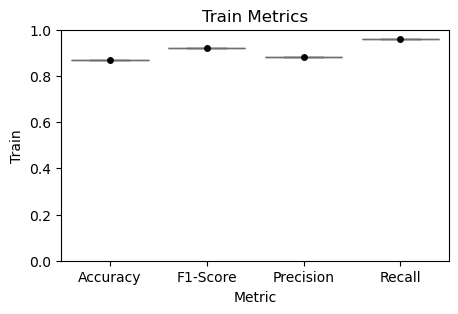

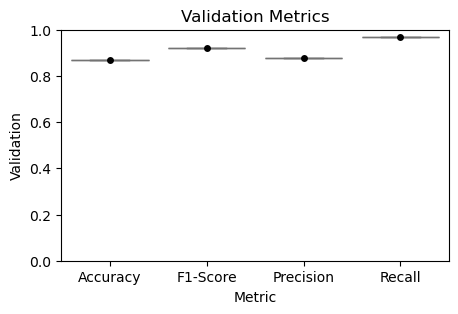

In [135]:
# Obtener las predicciones del mejor modelo
y_train_pred = best_model.predict(X_train_transformado)
y_val_pred = best_model.predict(X_val_transformado)

# Calcular todas las métricas
train_accuracy = accuracy_score(ytrain, y_train_pred)
val_accuracy = accuracy_score(yval, y_val_pred)
train_f1_score = f1_score(ytrain, y_train_pred)
val_f1_score = f1_score(yval, y_val_pred)
train_precision = precision_score(ytrain, y_train_pred)
val_precision = precision_score(yval, y_val_pred)
train_recall = recall_score(ytrain, y_train_pred)
val_recall = recall_score(yval, y_val_pred)

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame({'Metric': ['Accuracy', 'F1-Score', 'Precision', 'Recall'],
                           'Train': [train_accuracy, train_f1_score, train_precision, train_recall],
                           'Validation': [val_accuracy, val_f1_score, val_precision, val_recall]})

# Diagramas de caja y bigote de las métricas
plt.figure(figsize=(5, 3))
sns.boxplot(data=metrics_df, x='Metric', y='Train', color='skyblue')
sns.stripplot(data=metrics_df, x='Metric', y='Train', color='black', size=5)
plt.title('Train Metrics')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=metrics_df, x='Metric', y='Validation', color='lightgreen')
sns.stripplot(data=metrics_df, x='Metric', y='Validation', color='black', size=5)
plt.title('Validation Metrics')
plt.ylim(0, 1)
plt.show()

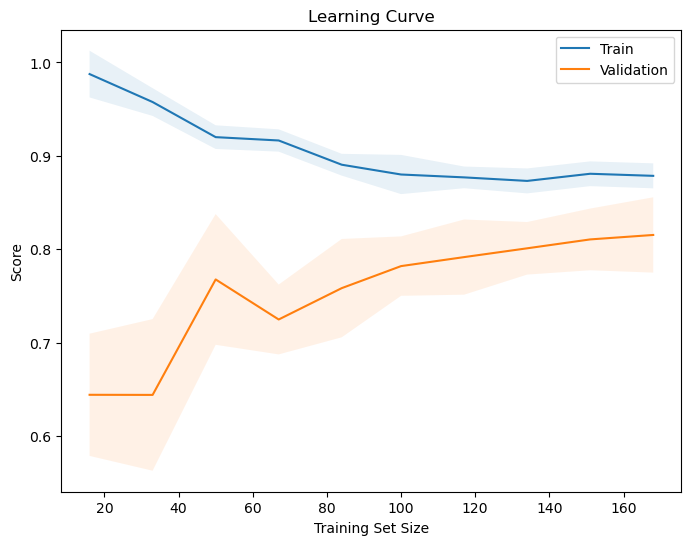

In [145]:
# Función para generar las curvas de aprendizaje
def plot_learning_curve(estimator, X, y, cv, train_sizes):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    # Calcular los promedios y las desviaciones estándar de las puntuaciones
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    # Graficar las curvas de aprendizaje
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Train')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3)
    plt.plot(train_sizes, val_scores_mean, label='Validation')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.3)
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

# Definir los tamaños de conjunto de entrenamiento a evaluar
train_sizes = np.linspace(0.1, 1.0, 10, 100)

# Generar las curvas de aprendizaje
plot_learning_curve(best_model, X_train_transformado, ytrain, cv=5, train_sizes=train_sizes)

In [137]:
print("Best Hyperparameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Best Hyperparameters: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Train Accuracy: 0.8672985781990521
Validation Accuracy: 0.868421052631579


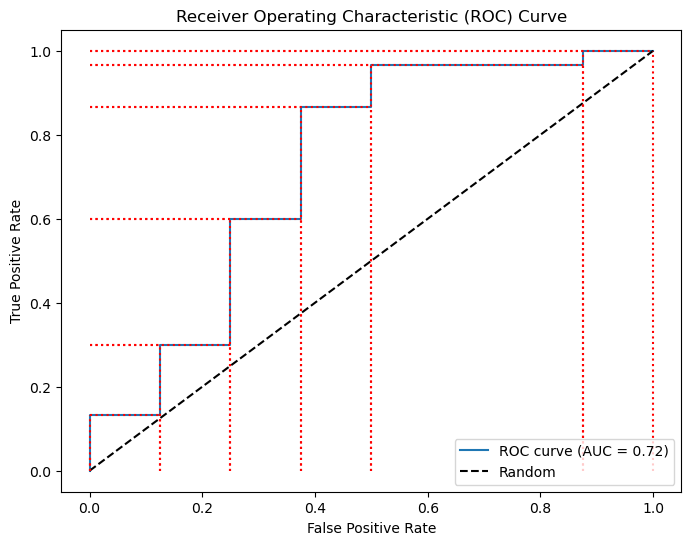

In [138]:
from sklearn import metrics

# Get the scores using decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(yval, scores_val)

#cm=confusion_matrix(ytest, y_val_pred)

# Calculate the AUC
auc = roc_auc_score(yval, scores_val)

# Plot the ROC curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.hlines(tpr, 0, fpr, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(fpr, 0, tpr, colors='r', linestyles='dotted')
plt.show()

In [146]:
# Obtener los puntajes utilizando decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Calcular el AUC
auc = roc_auc_score(yval, scores_val)

print('AUC:', auc)

AUC: 0.725


In [147]:
# Obtener los puntajes utilizando decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Crear una lista para almacenar los valores de f1-score
f1_scores = []

# Probar diferentes umbrales de predicción
thresholds = np.linspace(np.min(scores_val), np.max(scores_val), 100)
for threshold in thresholds:
    # Convertir los puntajes en etiquetas binarias utilizando el umbral
    y_pred = np.where(scores_val >= threshold, 1, 0)
    # Calcular el f1-score utilizando las etiquetas predichas
    f1 = f1_score(yval, y_pred)
    # Agregar el valor del f1-score a la lista
    f1_scores.append(f1)

# Encontrar el umbral que maximiza el f1-score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = np.max(f1_scores)

print('Mejor umbral:', best_threshold)
print('Mejor F1-Score:', best_f1_score)

Mejor umbral: 0.002397628175346833
Mejor F1-Score: 0.9206349206349207


In [148]:
# Obtener los puntajes utilizando decision_function
scores_val = best_model.decision_function(X_val_transformado)

# Crear una lista para almacenar los valores de g-mean
g_mean_scores = []

# Probar diferentes umbrales de predicción
thresholds = np.linspace(np.min(scores_val), np.max(scores_val), 100)
for threshold in thresholds:
    # Convertir los puntajes en etiquetas binarias utilizando el umbral
    y_pred = np.where(scores_val >= threshold, 1, 0)
    # Calcular la matriz de confusión utilizando las etiquetas predichas
    tn, fp, fn, tp = confusion_matrix(yval, y_pred).ravel()
    # Calcular el g-mean utilizando los valores de la matriz de confusión
    g_mean = np.sqrt(tp / (tp + fn) * tn / (tn + fp))
    # Agregar el valor del g-mean a la lista
    g_mean_scores.append(g_mean)

# Encontrar el umbral que maximiza el g-mean
best_threshold = thresholds[np.argmax(g_mean_scores)]
best_g_mean = np.max(g_mean_scores)

print('Mejor umbral:', best_threshold)
print('Mejor G-Mean:', best_g_mean)

Mejor umbral: 0.29985698694106033
Mejor G-Mean: 0.7359800721939873


## **Versionado de datos**

In [ ]:
X=data.drop(columns=["credit_risk"])
y=data[["credit_risk"]]
Xtrain, Xtemp, ytrain, ytemp = train_test_split(X, y[["credit_risk"]], test_size=0.3, random_state=42, stratify=y["credit_risk"])
Xval, Xtest, yval, ytest = train_test_split(Xtemp, ytemp, test_size=0.5, random_state=42, stratify=ytemp)

print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

In [ ]:
fig, axs=plt.subplots(4,5, figsize=(20,20))
for col, ax in zip(Xtrain.describe().columns, axs.ravel()):
  sns.histplot(x=Xtrain[col], ax=ax, kde=True)

## **Construcción, ajuste y evaluación de Modelos de Machine Learning**

## **Aplicación de Mejores Prácticas en el Pipeline de Modelado**

## **Estructuración y Refactorización del Código**